In [ ]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
upload = files.upload()

Saving listing7.4.xlsx to listing7.4.xlsx


In [ ]:
# Load dataset
df = pd.read_excel(io.BytesIO(upload['listing7.4.xlsx']))

In [ ]:
# Drop the columns from the DataFrame
numeric_df_without_id = df.drop(columns=['id','T','longitude','latitude']).select_dtypes(include=[np.number])

In [ ]:
df.columns

Index(['id', 'F', 'T', 'price', 'revenue', 'last_scraped', 'source',
       'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'beds', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_acc

In [ ]:
numeric_df_without_id

,F,price,revenue,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,beds,minimum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3,1600,4800,NaN,NaN,1,3,1,NaN,1,...,NaN,NaN,NaN,NaN,NaN,1,0,1,0,NaN
1,365,1400,511000,NaN,0.14,1,1,1,1.0,7,...,4.75,4.00,3.75,3.75,4.00,1,0,1,0,0.06
2,365,1300,474500,1.0,1.00,4,4,2,1.0,1,...,4.87,4.90,4.85,4.75,4.81,4,0,4,0,3.06
3,276,1200,331200,NaN,0.00,1,1,6,3.0,3,...,4.58,4.84,4.95,4.79,4.68,1,1,0,0,0.29
4,365,1000,365000,NaN,0.00,1,1,6,3.0,3,...,4.36,4.85,4.77,4.82,4.21,1,1,0,0,0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2868,365,14,5110,NaN,NaN,3,3,2,1.0,180,...,3.83,4.58,4.58,4.17,4.42,3,2,1,0,0.25
2869,365,14,5110,1.0,0.73,3,3,2,1.0,3,...,4.83,4.94,4.84,4.83,4.69,1,1,0,0,1.71
2870,365,13,4745,1.0,1.00,1,2,6,3.0,5,...,4.64,5.00,5.00,4.36,4.73,1,1,0,0,0.27
2871,365,12,4380,NaN,NaN,1,1,4,2.0,365,...,5.00,4.67,5.00,5.00,4.67,1,1,0,0,0.19


In [ ]:
# Calculate the correlation matrix for the remaining numeric columns
correlation_matrix = numeric_df_without_id.corr()

In [ ]:
# Isolate the 'revenue' correlations, excluding itself
correlation_with_revenue = correlation_matrix['revenue'].drop('revenue').sort_values(ascending=False)




<ipython-input-12-c6e13eee1f11>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=correlation_with_revenue.values, y=correlation_with_revenue.index, palette='coolwarm')


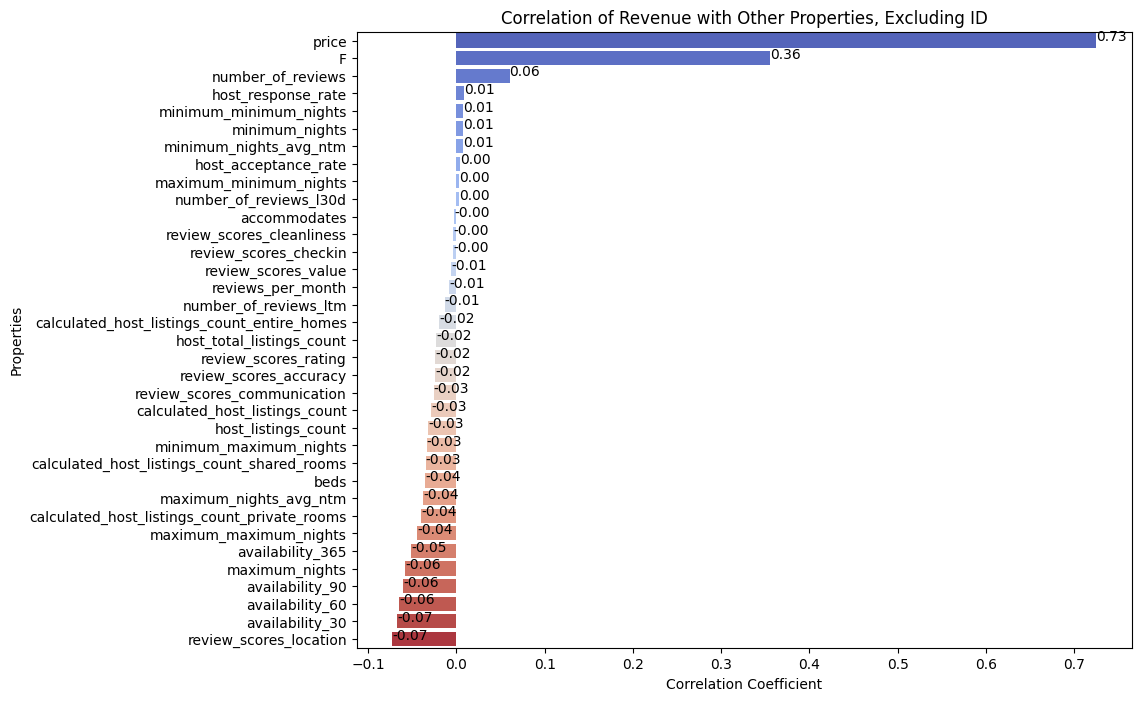

In [ ]:
plt.figure(figsize=(10, 8))
barplot = sns.barplot(x=correlation_with_revenue.values, y=correlation_with_revenue.index, palette='coolwarm')
plt.title('Correlation of Revenue with Other Properties, Excluding ID')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Properties')
for index, value in enumerate(correlation_with_revenue.values):
    plt.text(value, index, f'{value:.2f}')
plt.show()

In [ ]:
# Prepare the data for Excel
# correlation_data_for_excel = correlation_with_revenue.reset_index()
# correlation_data_for_excel.columns = ['Property', 'Correlation with Revenue']

In [ ]:
# Given correlation values
correlation_price_with_revenue = 0.73
correlation_F_with_revenue = 0.36

# Step 1: Calculate the sum of the absolute values of the correlations
sum_correlations = abs(correlation_price_with_revenue) + abs(correlation_F_with_revenue)

# Step 2: Normalize each correlation to find their weighted contributions
normalized_correlation_price = abs(correlation_price_with_revenue) / sum_correlations
normalized_correlation_F = abs(correlation_F_with_revenue) / sum_correlations

# Convert to percentage
percentage_correlation_price = normalized_correlation_price * 100
percentage_correlation_F = normalized_correlation_F * 100

print(f"Normalized (Percentage) Contribution of Price to Revenue: {percentage_correlation_price}%")
print(f"Normalized (Percentage) Contribution of F to Revenue: {percentage_correlation_F}%")

Normalized (Percentage) Contribution of Price to Revenue: 66.97247706422019%
Normalized (Percentage) Contribution of F to Revenue: 33.02752293577982%


In [ ]:
# Save the DataFrame to an Excel file
# correlation_data_for_excel.to_excel("correlation_with_revenue.xlsx", index=False)

In [ ]:
# Standardize the 'price' column
df['price_standardized'] = (df['price'] - df['price'].mean()) / df['price'].std()

# Standardize the 'F' column
df['F_standardized'] = (df['F'] - df['F'].mean()) / df['F'].std()

# Display the first few rows to check the new standardized columns
print(df[['price', 'price_standardized', 'F', 'F_standardized']].head(2000))

      price  price_standardized    F  F_standardized
0      1600           14.134441    3       -1.948432
1      1400           12.249008  365        0.736098
2      1300           11.306291  365        0.736098
3      1200           10.363574  276        0.076089
4      1000            8.478141  365        0.736098
...     ...                 ...  ...             ...
1995     49           -0.487095  365        0.736098
1996     49           -0.487095  350        0.624860
1997     49           -0.487095  347        0.602613
1998     49           -0.487095  295        0.216990
1999     49           -0.487095  275        0.068673

[2000 rows x 4 columns]


In [ ]:
excel_path = 'standardized_price_F.xlsx'

# Write the DataFrame to an Excel file
df[['id','price', 'price_standardized', 'F', 'F_standardized']].head(12000).to_excel(excel_path, index=False, engine='openpyxl')

print(f"Excel file has been saved to: {excel_path}")

Excel file has been saved to: standardized_price_F.xlsx


In [ ]:
price_mean = df['price'].mean()
price_std = df['price'].std()

print(f"Mean (Average) of Price: {price_mean}")
print(f"Standard Deviation of Price: {price_std}")

Mean (Average) of Price: 100.66933518969718
Standard Deviation of Price: 106.07640311024491


In [ ]:
F_mean = df['F'].mean()
F_std = df['F'].std()

print(f"Mean (Average) of F: {F_mean}")
print(f"Standard Deviation of F: {F_std}")

Mean (Average) of F: 265.7396449704142
Standard Deviation of F: 134.84673190443164
